In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import tempfile
from sbtab import SBtab

from equilibrator_api import ComponentContribution, Q_
from equilibrator_pathway.cost_function import EnzymeCostFunction
from equilibrator_pathway.ecm_model import EnzymeCostModel
from equilibrator_pathway import ThermodynamicModel

plt.style.use("seaborn-dark")
comp_contrib = ComponentContribution()

In [2]:
BASE_URL = "https://gitlab.com/principlescellphysiology/book-economic-principles-in-cell-biology/-/raw/master/summer-school-2022/lpi-slides/lectures/PAT/exercises/"

def read_model(fname: str) -> EnzymeCostModel:
    model = EnzymeCostModel.from_sbtab(fname + ".csv", comp_contrib=comp_contrib)
    return model

## Example 1: Comparing the enzyme costs of glycolysis pathways

In [3]:
model_emp = read_model("glycolysis_emp")
model_ed = read_model("glycolysis_ed")
solution_emp = model_emp.optimize_ecm()
solution_ed = model_ed.optimize_ecm()

/home/eladn/git/book-economic-principles-in-cell-biology/venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1983: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values
/home/eladn/git/book-economic-principles-in-cell-biology/venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1983: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


In [4]:
total_conc_emp = solution_emp.enzyme_df.concentration.sum()
total_conc_ed = solution_ed.enzyme_df.concentration.sum()

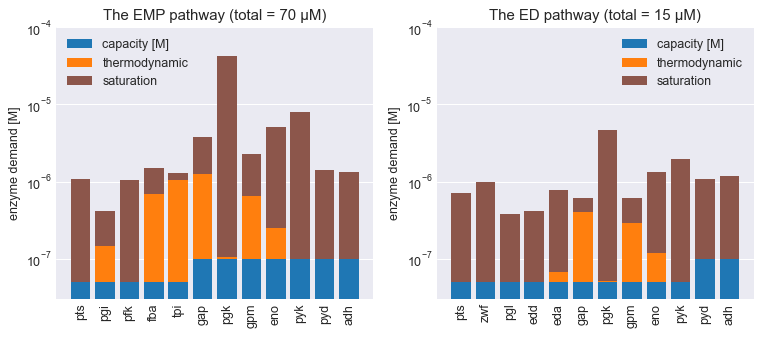

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=90)

ax = axs[0]
ax.set_title(f"The EMP pathway (total = {total_conc_emp.m_as('uM'):.2g} μM)")
solution_emp.plot_enzyme_demand_breakdown(ax, plot_measured=True)
ax.set_ylim(3e-8, 1e-4)
ax.set_xlim(-1, None)
ax.axes.yaxis.grid(True, which="major")

ax = axs[1]
ax.set_title(f"The ED pathway (total = {total_conc_ed.m_as('uM'):.2g} μM)")
solution_ed.plot_enzyme_demand_breakdown(ax, plot_measured=True)
ax.set_ylim(3e-8, 1e-4)
ax.set_xlim(-1, None)
ax.axes.yaxis.grid(True, which="major")

fig.savefig("emp_vs_ed_demand.pdf")

## Example 2: ECM

Here we will see how to run ECM on a model of central metabolism and compare the results to measured data

In [6]:
model = read_model("central_metabolism")
model.add_validation_data("central_metabolism_validation.csv")
ecm_sol = model.optimize_ecm()

/home/eladn/git/book-economic-principles-in-cell-biology/venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1983: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


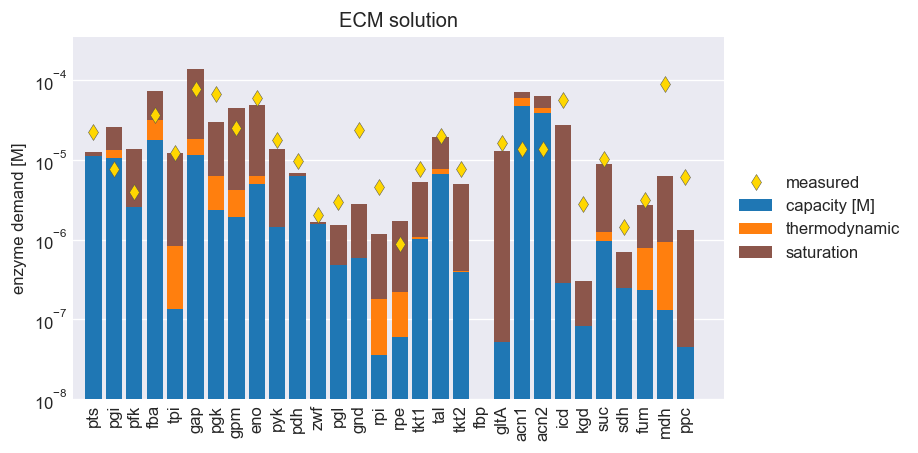

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4), dpi=120)
ax.set_title("ECM solution")
ecm_sol.plot_enzyme_demand_breakdown(ax, plot_measured=True)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_ylim(1e-8, None)
ax.set_xlim(-1, None)
ax.axes.yaxis.grid(True, which="major")

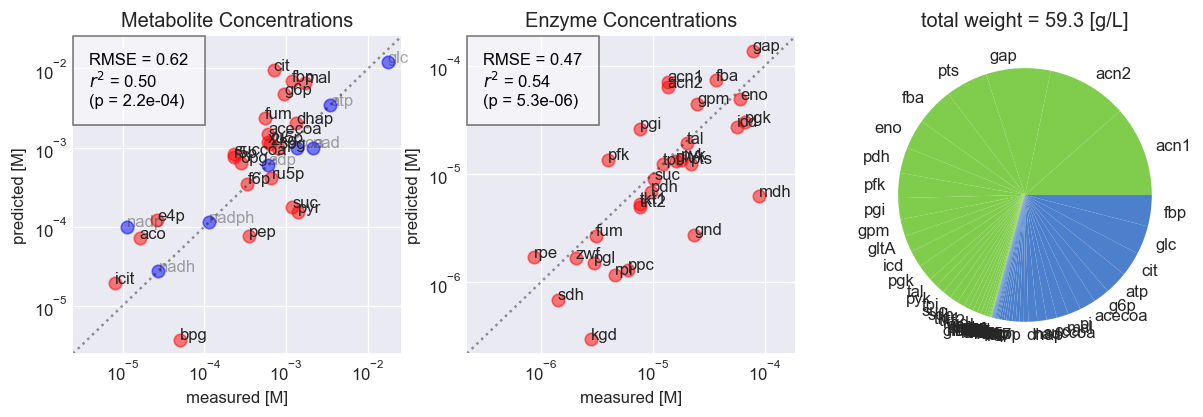

In [8]:
fig = plt.figure(figsize=(12, 3.5), dpi=120)
ax = fig.add_subplot(1, 3, 1, xscale="log", yscale="log")
ax.set_title("Metabolite Concentrations")
ecm_sol.validate_metabolite_conc(ax)

ax = fig.add_subplot(1, 3, 2, xscale="log", yscale="log")
ax.set_title("Enzyme Concentrations")
ecm_sol.validate_enzyme_conc(ax)

ax = fig.add_subplot(1, 3, 3)
ecm_sol.plot_volumes_pie(ax=ax)